In [54]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [55]:
df = pd.read_csv('fashion-mnist_test.csv')
print('The shape of testing dataset : ', df.shape)

The shape of testing dataset :  (10000, 785)


In [56]:
df = df.loc[df['label'].isin([0,1])]

In [57]:
df['label']
df = df.dropna()
df.label.value_counts()

label
0    1000
1    1000
Name: count, dtype: int64

In [58]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [59]:
import umap


In [60]:
reducer = umap.UMAP()

In [61]:
vals = df.drop('label', axis=1).values
scaled_penguin_data = StandardScaler().fit_transform(vals)

In [62]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(2000, 2)

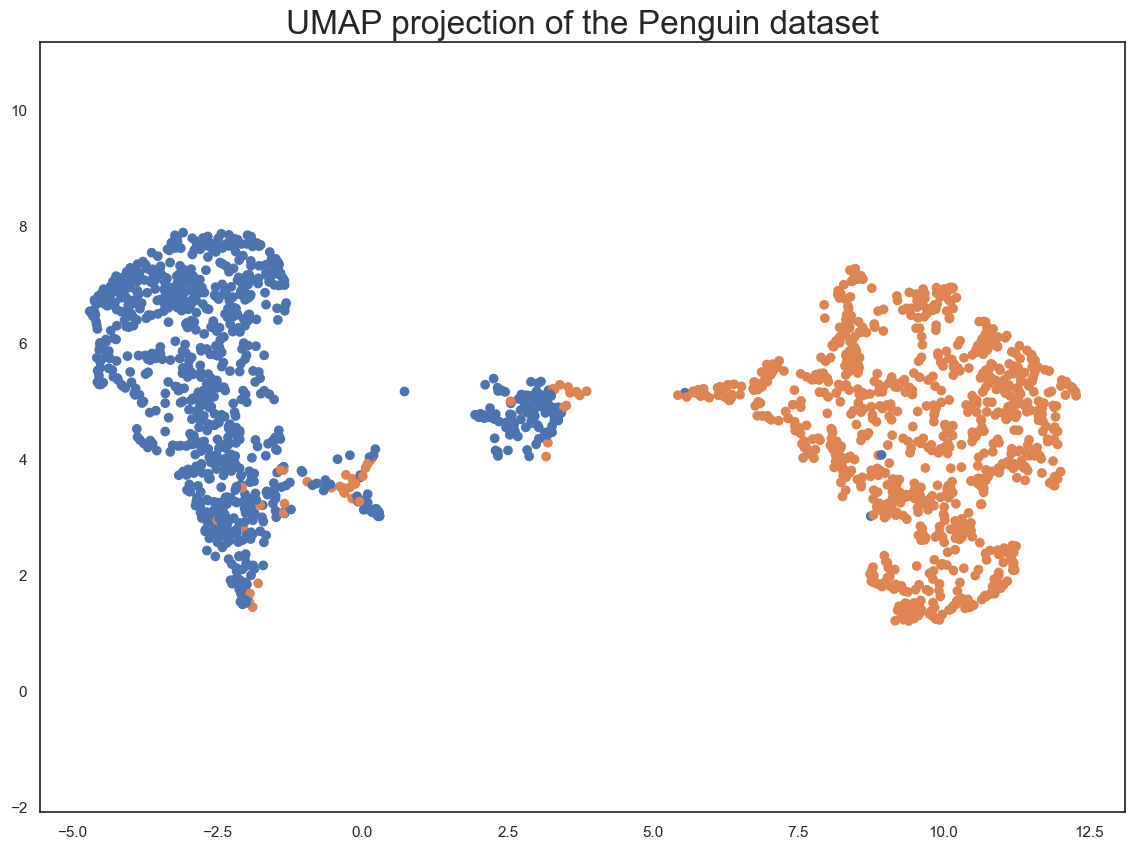

In [63]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [64]:
v1 = scaled_penguin_data[:,:300]
v2 = scaled_penguin_data[:,300:]
v3 = scaled_penguin_data[:1000,:]
v4 = scaled_penguin_data[1000:,:]

In [65]:
emb0 = reducer.fit_transform(v1)
emb1 = reducer.fit_transform(v2)
emb3 = reducer.fit_transform(v3)
emb4 = reducer.fit_transform(v4)

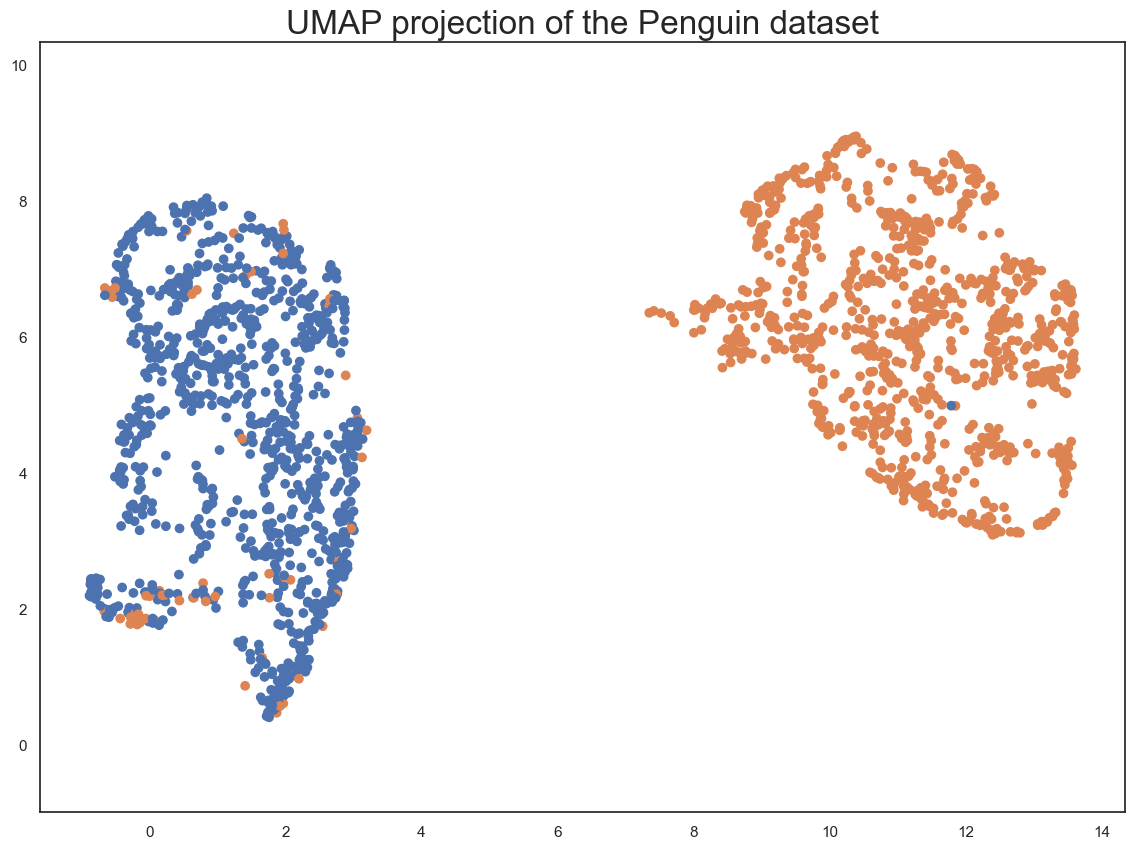

In [66]:
plt.scatter(
    emb1[:, 0],
    emb1[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

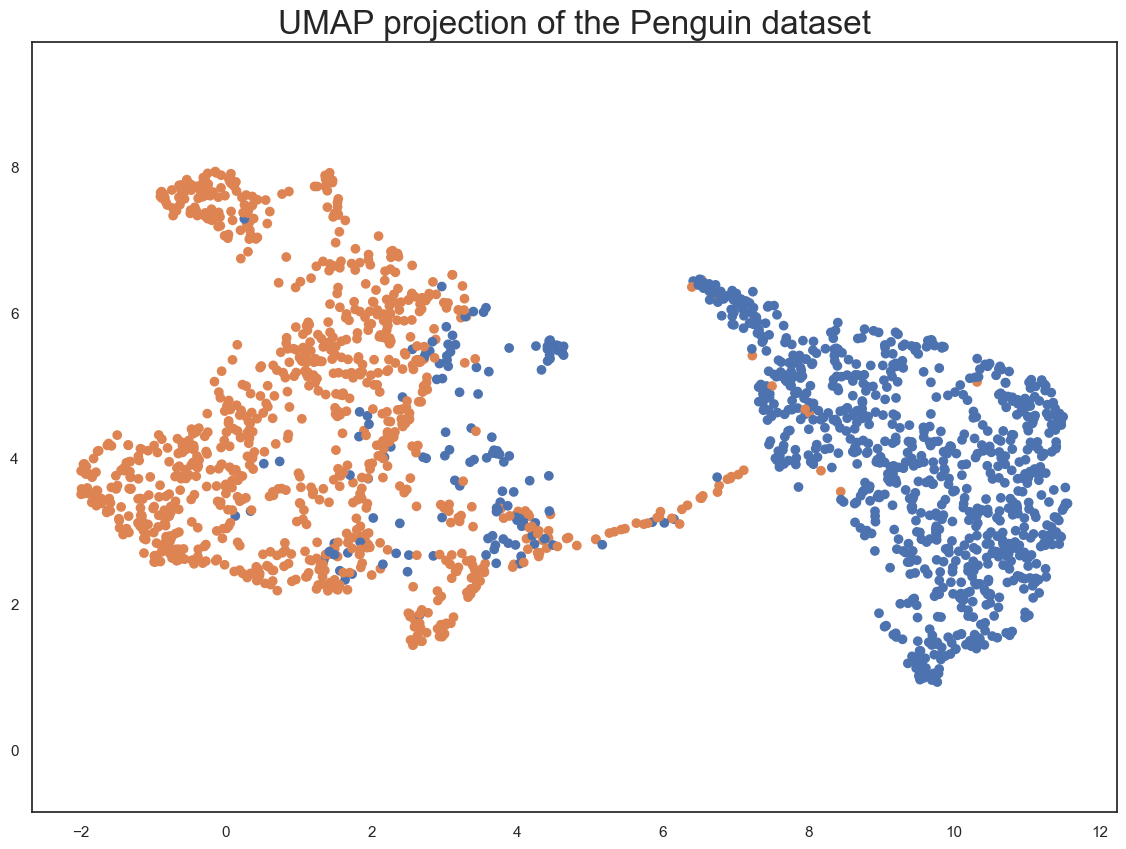

In [67]:
plt.scatter(
    emb0[:, 0],
    emb0[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [68]:
df0 = pd.DataFrame(emb0, columns = ['A','B'])
df1 = pd.DataFrame(emb1, columns = ['C','D'])
result = pd.concat([df0, df1], axis=1)
result

,A,B,C,D
0,9.828110,1.399321,0.023098,5.540295
1,-1.341449,4.175810,11.659268,8.392635
2,8.010736,4.760050,2.703809,2.501484
3,2.576943,1.467651,10.223552,8.886443
4,3.077684,2.540780,10.312203,6.578023
...,...,...,...,...
1995,7.436275,4.521740,2.764973,2.637027
1996,8.962476,5.725337,0.062565,1.807330
1997,7.831629,4.001750,1.790135,3.066574
1998,8.749847,4.241322,2.181325,3.829404


In [69]:
penguin_data3 = result[
    [
        "A","B","C","D",
    ]
].values
scaled_penguin_data3 = StandardScaler().fit_transform(penguin_data3)

In [70]:
# embedding3 = reducer.fit_transform(scaled_penguin_data3)

red = umap.UMAP(n_components=3)
embedding3 = red.fit_transform(scaled_penguin_data3)
embedding3.shape

(2000, 3)

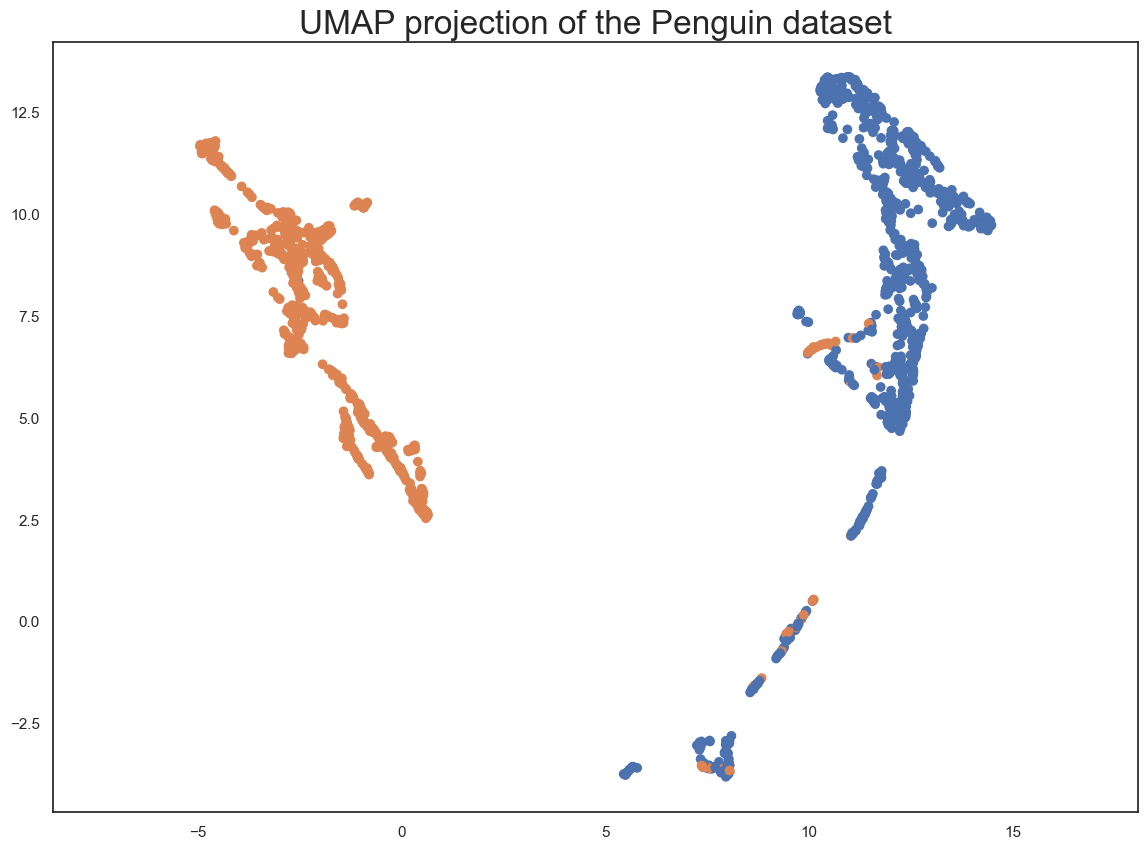

In [71]:
plt.scatter(
    embedding3[:, 0],
    embedding3[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [72]:
from sklearn.cluster import KMeans

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


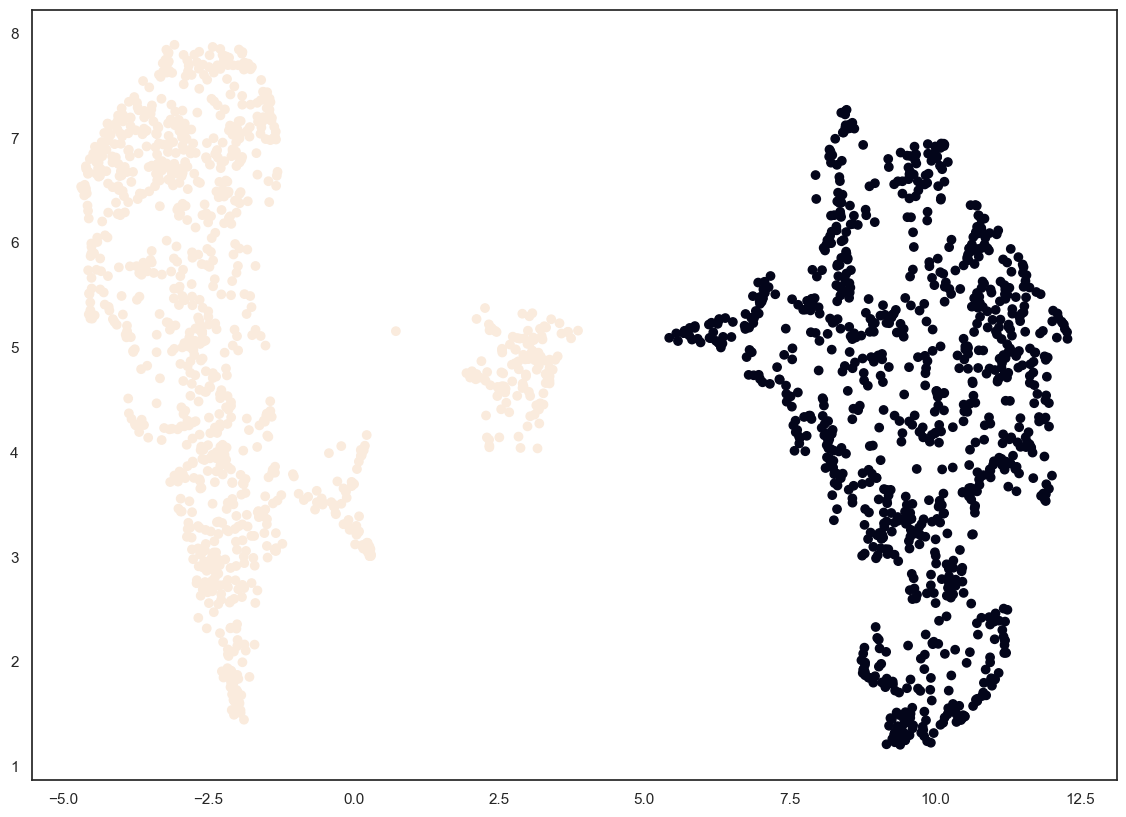

In [73]:
data = list(zip(embedding[:,0], embedding[:,1]))
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(embedding[:,0], embedding[:,1], c=kmeans.labels_)
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


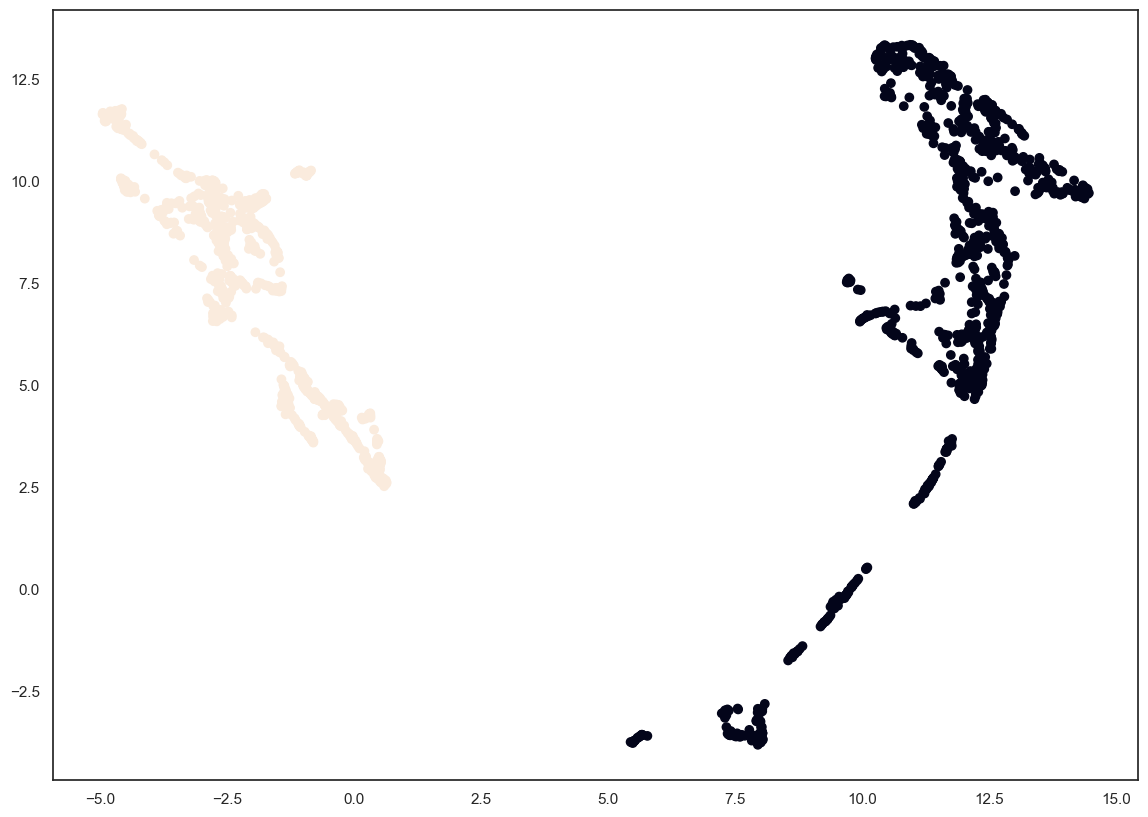

In [74]:
data = list(zip(embedding3[:,0], embedding3[:,1]))
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data)

plt.scatter(embedding3[:,0], embedding3[:,1], c=kmeans1.labels_)
plt.show()

In [75]:
a = 0
for i in range(0,  len(kmeans1.labels_)):
    if kmeans1.labels_[i] != kmeans.labels_[i]:
        a = a + 1
a / len(kmeans1.labels_)

0.9915